# Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv("boston_housing.csv")

## Train - Test Splitting

In [3]:
train_set, test_set = train_test_split(housing, test_size = 0.2)

In [4]:
print(f" Rows in train set : {len(train_set)} \n Rows in test set: {len(test_set)} \n") 

 Rows in train set : 404 
 Rows in test set: 102 



# this whole functon is in sklearn

In [5]:
#from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [6]:
#print(f" Rows in train set : {len(train_set)} \n Rows in test set: {len(test_set)} \n")

##We are using stratified learning because to seprate CHAS values in both test and train data sets

In [7]:


from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [9]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [10]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## Looking for co relations

In [11]:
corr = housing.corr()

## correlation basically tells how much the value MEDV changes wrt to other features

In [12]:
corr["MEDV"].sort_values(ascending=False)


MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540380
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

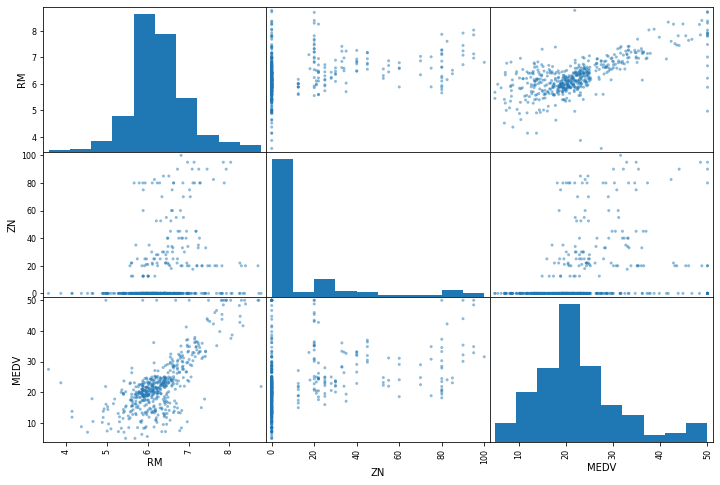

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['RM', 'ZN', 'MEDV']
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

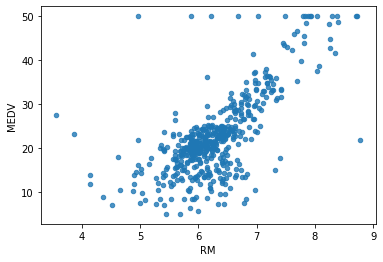

In [14]:
housing.plot(kind="scatter", x = "RM", y="MEDV", alpha=0.8)

In [15]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


## Creating Pipleline


In [16]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),

])

housing_new = my_pipeline.fit_transform(housing) 

In [18]:
housing_new.shape

(404, 13)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_new, housing_labels)

RandomForestRegressor()

In [20]:
some_data = housing.iloc[:5]

In [21]:
some_labels = housing_labels.iloc[:5]

In [22]:
prepared_data = my_pipeline.transform(some_data)

In [23]:
model.predict(prepared_data)


array([22.322, 25.786, 16.405, 23.2  , 23.544])

In [24]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

EVALUATING THE MODEL



In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
housing_predictions = model.predict(housing_new)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [27]:
rmse ##not good enough

1.174356386821022

In [28]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_new, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-score)

In [29]:
rmse_scores

array([2.84595864, 2.78314925, 4.45907409, 2.69602792, 3.58258034,
       2.68237616, 4.94760171, 3.39806799, 3.17417764, 3.07038947])

In [30]:
print("array([4.21554054, 4.47792731, 4.98595284, 6.34383266, 5.28161956]) LR \narray([4.95871847, 4.49407017, 5.45017839, 5.17634696, 3.23797776]) DTR")


array([4.21554054, 4.47792731, 4.98595284, 6.34383266, 5.28161956]) LR 
array([4.95871847, 4.49407017, 5.45017839, 5.17634696, 3.23797776]) DTR


DecisionTreeRegressor is better here

In [31]:
def print_scores(rmse_scores):
    print("Scores", score)
    print("mean", score.mean())
    print("Standard Deviation", score.std())

In [32]:
print_scores(rmse_scores)

Scores [ -8.09948056  -7.74591976 -19.88334176  -7.26856654 -12.83488188
  -7.19514188 -24.47876265 -11.54686605 -10.07540368  -9.42729148]
mean -11.855565620975616
Standard Deviation 5.546779378581308
